In [1]:
import mga_alt
import numpy as np
import matplotlib.pyplot as plt
from problems import ChankongHaimes
from problems import BinhKorn
from evaluator import NonDominatedSortEvaluator

In [2]:
problem = ChankongHaimes()
evaluator = NonDominatedSortEvaluator(problem)
random_restarts = 500
MGA = mga_alt.MicroGeneticAlgorithm(
    problem,
    evaluator,
    population_size=10,
    agents_to_keep=8,
    agents_to_shuffle=6,
    random_restarts=random_restarts,
    max_iterations=20,
    num_bits=64,
    random_seed=0,
)
MGA.run_iterations()

Random restart 0 done                   best fitness: 0.0                    Non-dominated sorted
Random restart 1 done                   best fitness: 0.0                    Non-dominated sorted
Random restart 2 done                   best fitness: 0.0                    Non-dominated sorted
Random restart 3 done                   best fitness: 0.0                    Non-dominated sorted
Random restart 4 done                   best fitness: 0.0                    Non-dominated sorted
Random restart 5 done                   best fitness: 0.0                    Non-dominated sorted
Random restart 6 done                   best fitness: 0.0                    Non-dominated sorted
Random restart 7 done                   best fitness: 0.0                    Non-dominated sorted
Random restart 8 done                   best fitness: 0.0                    Non-dominated sorted
Random restart 9 done                   best fitness: 0.0                    Non-dominated sorted
Random restart 10 do

In [3]:
f1 = np.zeros((random_restarts))
f2 = np.zeros((random_restarts))
non_dominated_agents = MGA.agents_history[MGA.fitness_history==0]
for i in range(len(non_dominated_agents)):
    f1[i] = problem.f_1(non_dominated_agents[i])
    f2[i] = problem.f_2(non_dominated_agents[i])

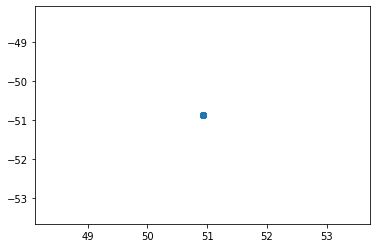

In [4]:
plt.scatter(f1,f2)

In [5]:
import benchmark_chankong_haimes as bm
from pymoo.optimize import minimize
from pymoo.core.problem import ElementwiseProblem
from pymoo.visualization.scatter import Scatter

# Predefined Problems, Algorithms and Terminations
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.util.termination.default import MultiObjectiveDefaultTermination

n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |     100 |  0.00000E+00 |  2.175589973 |       9 |            - |            -
    2 |     200 |  0.00000E+00 |  0.154700553 |      15 |  0.022606580 |        ideal
    3 |     300 |  0.00000E+00 |  0.00000E+00 |      31 |  0.004910784 |        ideal
    4 |     400 |  0.00000E+00 |  0.00000E+00 |      39 |  0.002983203 |        nadir
    5 |     500 |  0.00000E+00 |  0.00000E+00 |      61 |  0.010176867 |            f
    6 |     600 |  0.00000E+00 |  0.00000E+00 |      94 |  0.100545200 |        ideal
    7 |     700 |  0.00000E+00 |  0.00000E+00 |     100 |  0.032386585 |        nadir
    8 |     800 |  0.00000E+00 |  0.00000E+00 |     100 |  0.002606420 |            f
    9 |     900 |  0.00000E+00 |  0.00000E+00 |     100 |  0.011328152 |        ideal
   10 |    1000 |  0.00000E+00 |  0.00000E+00 |     100 |  0.001791952 |            f
   11 |    1100 |  0.00000E+00 |  0.00000E+00 |     10

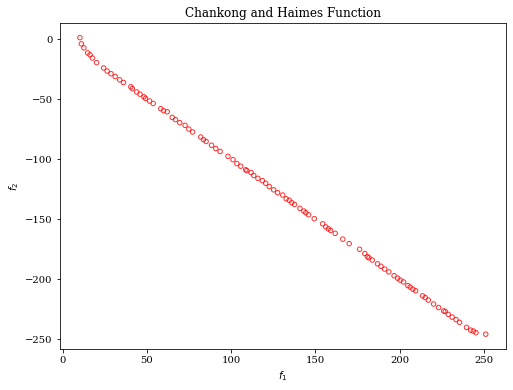

In [6]:
problem = bm.ChankongHaimes()
algorithm = NSGA2()
termination = MultiObjectiveDefaultTermination()
result = minimize(
    problem,
    algorithm,
    termination,
    pf=True,
    seed=1,
    save_history=True,
    verbose=True,
)
plot = Scatter(title="Chankong and Haimes Function")
plot.add(result.F, facecolor="none", edgecolor="red", alpha=0.8, s=20)
plot.show()

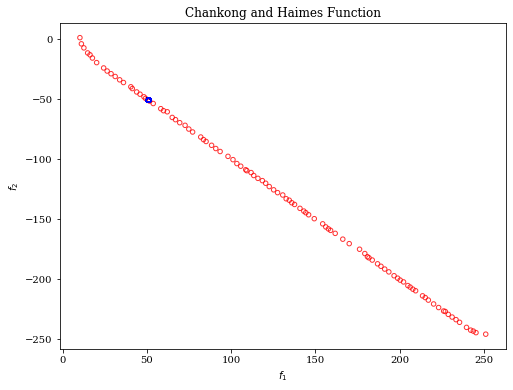

In [7]:
f = np.vstack((f1, f2)).T
#f = f[:100][:]
plot = Scatter(title="Chankong and Haimes Function")
plot.add(result.F, facecolor="none", edgecolor="red", alpha=0.8, s=20)
plot.add(f, facecolor="none", edgecolor="blue", alpha=0.8, s=20)
plot.show()